In [2]:
%matplotlib inline
import math
import random

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

'''Since this is a classification problem, we will need to 
represent our targets as one-hot encoding vectors (see previous lab).
To do this we will use scikit-learn's OneHotEncoder module 
which we import here'''
from sklearn.preprocessing import OneHotEncoder

import numpy as np
import tensorflow as tf

sns.set(style="ticks", color_codes=True)

In [3]:
dataset = load_boston()
houses = pd.DataFrame(dataset.data, columns=dataset.feature_names)
houses['target'] = dataset.target

averageprice = np.mean(houses['target'])
#print averageprice
print houses['target'][1]
for i, house in enumerate(houses['target']):
    houses['target'][i]=int(house>averageprice)
    if house > averageprice:
        houses['target'][i] = 1
    else:
        houses['target'][i]=0
    print houses['target'][i]

# WRITE CODE TO CONVERT 'TARGET' COLUMN FROM CONTINUOUS TO CATEGORICAL

21.6
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0

In [4]:
'''check your work'''
print np.max(houses['target']), "<-- should be 1"
print np.min(houses['target']), "<-- should be 0"

1.0 <-- should be 1
0.0 <-- should be 0


In [5]:
houses_array = houses.as_matrix().astype(float)
np.random.shuffle(houses_array)

X = houses_array[:, :-1]
y = houses_array[:, -1]

# USE SCIKIT-LEARN'S ONE-HOT ENCODING MODULE TO 
# CONVERT THE y ARRAY OF TARGETS TO ONE-HOT ENCODING.

y = y.reshape(-1,1)

# create an instance of the one-hot encoding function from the sci-kit learn library
enc = OneHotEncoder(categorical_features='all', handle_unknown='error', n_values='auto', sparse=False)
# use the function to figure out how many categories exist in the data
enc.fit(y)
print enc.n_values_
print enc.feature_indices_

print y.shape

# convert only the target data in the training set to one-hot encoding
y=enc.transform(y)
print y
print y.shape


X = X / X.max(axis=0)

trainingSplit = int(.7 * houses_array.shape[0])
X_train = X[:trainingSplit]
y_train = y[:trainingSplit]
X_test = X[trainingSplit:]
y_test = y[trainingSplit:]

print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

[2]
[0 2]
(506, 1)
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]]
(506, 2)
('Training set', (354, 13), (354, 2))
('Test set', (152, 13), (152, 2))


In [6]:
'''check your work'''
print y_train.shape[1], "<-- should be 2"
print y_test.shape[1], "<-- should be 2"
print y_train[0], "<-- should be either [0. 1.] or [1. 0.]"

2 <-- should be 2
2 <-- should be 2
[ 1.  0.] <-- should be either [0. 1.] or [1. 0.]


In [7]:
# helper variables
num_samples = X_train.shape[0]
num_features = X_train.shape[1]
num_outputs = y_train.shape[1]

# Hyper-parameters
batch_size = 40
num_hidden_1 = 20
num_hidden_2 =  20
learning_rate =  0.5
training_epochs =  500
dropout_keep_prob = 1 # 0.5 # set to no dropout by default

# variable to control the resolution at which the training results are stored
display_step = 5

In [8]:
def accuracy(predictions, targets):
    
    # IMPLEMENT THE NEW ACCURACY MEASURE HERE
    predictions = np.argmax(predictions, 1)

    targets = np.argmax(targets, 1)

    n_correct = float(np.sum(predictions==targets))

    n_pts = float(predictions.shape[0])
    accuracy = n_correct/n_pts*100.0
    print accuracy
    return accuracy

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

print accuracy(y, y)

100.0
100.0


In [9]:
graph = tf.Graph()

with graph.as_default():
    
    x = tf.placeholder(tf.float32, shape=(None, num_features))
    _y = tf.placeholder(tf.float32, shape=(None))
    
    keep_prob = tf.placeholder(tf.float32)
    
    tf_X_test = tf.constant(X_test, dtype=tf.float32)
    tf_X_train = tf.constant(X_train, dtype=tf.float32)
    
    
    W_fc1 = weight_variable([num_features, num_hidden_1])
    b_fc1 = bias_variable([num_hidden_1])
    
    W_fc2 = weight_variable([num_hidden_1, num_hidden_2])
    b_fc2 = bias_variable([num_hidden_2])
    
    W_fc3 = weight_variable([num_hidden_2, num_outputs])
    b_fc3 = bias_variable([num_outputs])
    
    
    def model(data, keep):
        
        fc1 = tf.nn.sigmoid(tf.matmul(data, W_fc1) + b_fc1)
        fc1_drop = tf.nn.dropout(fc1, keep)
        
        fc2 = tf.nn.sigmoid(tf.matmul(fc1_drop, W_fc2) + b_fc2)
        fc2_drop = tf.nn.dropout(fc2, keep)
        
        fc3 = tf.matmul(fc2_drop, W_fc3) + b_fc3
        
        return fc3
    
    '''for our loss function we still want to get the raw outputs 
    of the model, but since it no longer represents the actual prediction 
    we rename the variable to ‘output’'''
    output = model(x, keep_prob)
    
    # WHEN WE CALCULATE THE PREDICTIONS, WE NEED TO WRAP EACH OUTPUT IN A
    # tf.nn.softmax() FUNCTION. THE FIRST ONE HAS BEEN DONE FOR YOU:
    prediction = tf.nn.softmax(output)
    test_prediction = model(tf_X_test, 1.0)
    train_prediction = model(tf_X_train, 1.0)
    
    '''finally, we replace our previous MSE cost function with the
    cross-entropy function included in Tensorflow. This function takes in the
    raw output of the network and calculates the average loss with the target'''
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(output, _y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    saver = tf.train.Saver()

In [10]:
results = []

with tf.Session(graph=graph) as session:
    
    tf.initialize_all_variables().run()
    #print('Initialized')

    for epoch in range(training_epochs):
        
        indexes = range(num_samples)
        random.shuffle(indexes)
        
        for step in range(int(math.floor(num_samples/float(batch_size)))):
            offset = step * batch_size
            
            batch_data = X_train[indexes[offset:(offset + batch_size)]]
            batch_labels = y_train[indexes[offset:(offset + batch_size)]]

            feed_dict = {x : batch_data, _y : batch_labels, keep_prob: dropout_keep_prob}
            
            _, l, p = session.run([optimizer, loss, prediction], feed_dict=feed_dict)

        if (epoch % display_step == 0):
            batch_acc = accuracy(p, batch_labels)
            train_acc =  accuracy(train_prediction.eval(session=session), y_train)
            test_acc =  accuracy(test_prediction.eval(session=session), y_test)
            results.append([epoch, batch_acc, train_acc, test_acc])

    save_path = saver.save(session, "model_houses_classification.ckpt")
    #print("Model saved in file: %s" % save_path)

52.5
42.6553672316
38.1578947368
52.5
57.3446327684
61.8421052632
52.5
42.6553672316
38.1578947368
55.0
57.3446327684
61.8421052632
55.0
57.3446327684
61.8421052632
57.5
57.3446327684
61.8421052632
55.0
57.3446327684
61.8421052632
55.0
57.3446327684
61.8421052632
40.0
57.3446327684
61.8421052632
50.0
67.2316384181
65.7894736842
60.0
57.3446327684
61.8421052632
57.5
76.5536723164
69.7368421053
87.5
79.0960451977
72.3684210526
87.5
79.6610169492
71.7105263158
80.0
79.3785310734
69.7368421053
90.0
79.9435028249
73.6842105263
85.0
83.0508474576
75.6578947368
90.0
85.0282485876
77.6315789474
85.0
84.4632768362
76.9736842105
60.0
74.8587570621
69.7368421053
87.5
87.0056497175
80.2631578947
85.0
81.6384180791
75.0
90.0
85.8757062147
77.6315789474
87.5
88.7005649718
81.5789473684
87.5
89.2655367232
81.5789473684
77.5
88.9830508475
78.9473684211
95.0
90.1129943503
82.2368421053
90.0
87.0056497175
79.6052631579
77.5
85.0282485876
78.2894736842
92.5
89.2655367232
78.9473684211
80.0
85.3107344633


Maximum test accuracy: 84.21%


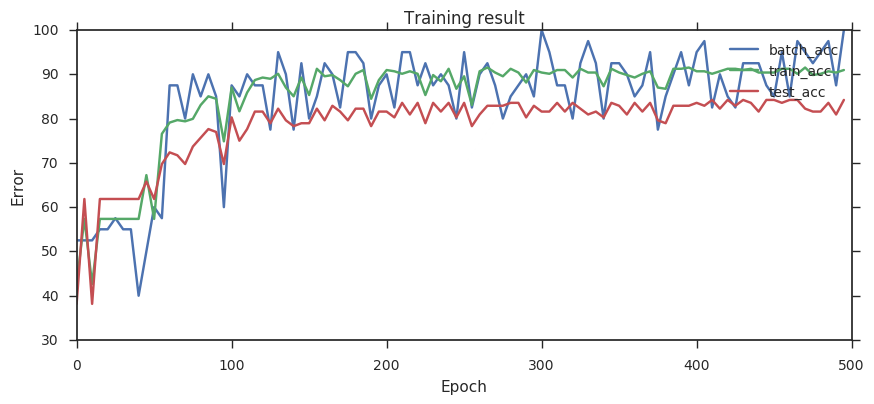

In [11]:
df = pd.DataFrame(data=results, columns = ["epoch", "batch_acc", "train_acc", "test_acc"])
df.set_index("epoch", drop=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
 
ax.plot(df)
ax.set(xlabel='Epoch',
       ylabel='Error',
       title='Training result')
 
ax.legend(df.columns, loc=1)

print "Maximum test accuracy: %.2f%%" % np.max(df["test_acc"])